# Data preparation for Bioimage.io upload

### Load data from the NAS

In [ ]:
from mitosplit_net.util import load_h5

data_path = '//lebnas1.epfl.ch/microsc125/Watchdog/MitoSplit-Net/Data/'


mito_data = load_h5(data_path, 'Mito')
drp1_data = load_h5(data_path, 'Drp1')

### Extract one frame and save as sample input

In [85]:
import numpy as np
from skimage.io import imsave

print(mito_data.shape)
frame_number = 27640

sample_input = np.stack([mito_data[frame_number], drp1_data[frame_number]], axis=2)
sample_input = np.expand_dims(sample_input, axis=0)

print(sample_input.shape)

imsave("sample_input.tif", sample_input)

(37000, 128, 128)
(1, 128, 128, 2)


### Load the model

In [86]:
from mitosplit_net.util import load_model

model_path = '//lebnas1.epfl.ch/microsc125/Watchdog/MitoSplit-Net/Model/'

model = load_model(model_path, 'model2')


Loading //lebnas1.epfl.ch/microsc125/Watchdog/MitoSplit-Net/Model/model2


### Construct expected output

In [87]:
sample_output = model.predict(sample_input)
imsave("sample_output.tif", sample_output)

C:\Users\stepp\AppData\Local\Temp/ipykernel_11812/328886733.py:2: UserWarning: sample_output.tif is a low contrast image
  imsave("sample_output.tif", sample_output)


### Make cover images from the sample data
Input

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


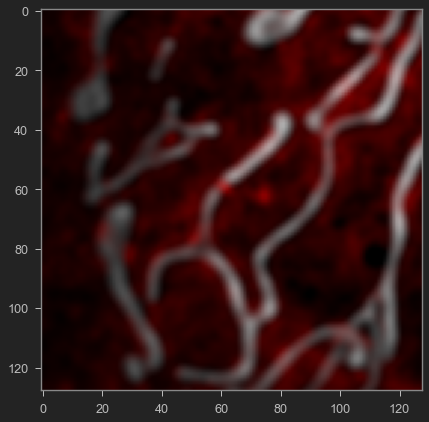

In [88]:
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.cm import gray
from layeris.layer_image import LayerImage

colors = [(0, 0, 0), (1, 0, 0)] # first color is black, last is red
cm = LinearSegmentedColormap.from_list("Custom", colors, N=255)

drp1_input = cm(sample_input[0, :, :, 1])
image = LayerImage.from_array(drp1_input)

mito_input = gray(sample_input[0, :, :, 0])
image.screen(mito_input)

plt.imshow(image.get_image_as_array())

imsave("sample_input.png", image.get_image_as_array())

**Output** 

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


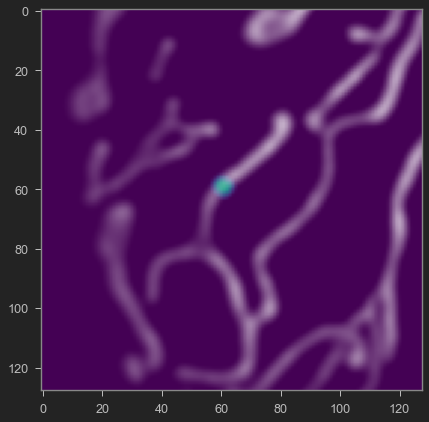

In [105]:
from matplotlib.cm import viridis

output = sample_output[0,:,:,0]
output = output/np.max(output)*255
output = output.astype(np.uint8)
output = viridis(sample_output[0,:,:,0])

# image = LayerImage.from_array(output)

mito_input = gray(sample_input[0, :, :, 0])
image = LayerImage.from_array(mito_input)
image.screen(output)

plt.imshow(image.get_image_as_array())

imsave("sample_output.png", image.get_image_as_array())